In [73]:
# Loading Data

%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import random


# using the SQLite Table to read data.
con = sqlite3.connect('final.sqlite') 



#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
cleaned_data = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con) 
#select a random 150 rows 

data_pos = cleaned_data[cleaned_data["Score"]=='positive'].sample(n = 5000, replace = True)
data_neg = cleaned_data[cleaned_data["Score"]=='negative'].sample(n = 5000,replace = True)
final_data = pd.concat([data_pos, data_neg])
cleaned_data['Score'].value_counts()

positive    38479
negative     7592
Name: Score, dtype: int64

In [74]:
# Sorting data based on time
# convert time into understnad time
final_data['Time'] = pd.to_datetime(final_data['Time'], unit = 's')
final_data

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
18283,18615,20300,B001BDDTB2,A3UORBSIKQ56ZB,kdea473,0,0,positive,2008-12-04,The cats weren't too impressed,I really wanted to like this product. I hadn'...,b'realli want like product hadnt heard brand v...
4526,32307,35168,B000E1DSQS,A2QG0Z96HULRW7,Margot,0,0,positive,2010-08-21,The Best Hazelnut Coffee,"Once I tasted Hazelnut coffee, I was hooked! N...",b'tast hazelnut coffe hook coffe drink maxwel ...
21910,31822,34643,B001EQ582E,ATZZFE4LM0SNI,"Timothy A. Robieson ""Bagpiper""",4,4,positive,2011-03-27,Enough mustard to roll around in.,I like honey mustard but the little bit you ge...,b'like honey mustard littl bit get store expen...
7170,46986,51105,B000FIXT2I,AM6KH81996PY6,L. Sullivan,3,3,positive,2009-09-29,Love this rice,This is the best stuff for working people. Th...,b'best stuff work peopl rice good plenti fast ...
21029,19136,20880,B001EPPCFS,A19NTPBCKGOCCO,"Amazon Fan ""Carol""",0,0,positive,2011-08-21,"Yum, Yum....",The required biscuit for Prince William's Groo...,b'requir biscuit princ william groom cake quee...
15028,1231,1331,B00126EQBU,A2QYFW82MD0SY6,DMH,0,0,positive,2012-06-05,What bacon is supposed to be,I figured there must be bacon out there like b...,b'figur must bacon like bacon use certain age ...
5654,11889,12950,B000ET93N2,A3CON8X1U5EXFL,"H. Stratton ""cstulsa""",1,1,positive,2010-09-11,"Great taste, even in pieces","Love the taste, but at least half of the crack...",b'love tast least half cracker everi packag sh...
13742,35503,38605,B000V9CLBG,A3HED8SW5DDP9Q,L. Satterlee,1,1,positive,2011-11-17,"The best caramel taste, DON'T BITE even slight...","The best caramel taste, softly suck and move a...",b'best caramel tast soft suck move around moun...
758,24062,26314,B000121BY6,A21243B24Q0P5Q,"M. Barker ""God bless us all""",2,2,positive,2007-05-14,Orangina! My Favorite Little Juice Friend!,Nothing is as comforting and as fun as the ora...,b'noth comfort fun orangina bottl photo justic...
8806,13924,15191,B000HALT80,A1ZFTROS0C3TVZ,GK,3,3,positive,2012-03-29,Great food that my 16-year old cat loves,Judging how swiftly my cat eats this food she ...,b'judg swift cat eat food truli like plus appa...


In [75]:
final_data = final_data.sort_values(by='Time')

In [76]:
X = final_data['CleanedText']
print('shape of X:', X.shape)

shape of X: (10000,)


In [77]:
# class label
y = final_data["Score"]
print('shape of y:', y.shape)

shape of y: (10000,)


In [78]:
# split data into train and test where 70% data used to train model and 30% for test
# final_data[:int(len(final_data) * 0.75)], final_data[int(len(final_data) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(7000,) (7000,) (3000,)


In [79]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

In [80]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_train

<7000x10483 sparse matrix of type '<class 'numpy.int64'>'
	with 228600 stored elements in Compressed Sparse Row format>

In [81]:
x_test = bow.transform(x_test)
x_test

<3000x10483 sparse matrix of type '<class 'numpy.int64'>'
	with 94172 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C':[10**-4, 10**-2, 10**0, 10**2, 10**4, 10**6]}]

#using GridsearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = None, cv= 10)
model.fit(X_train, y_train)

print(model.best_estimator_)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [83]:
pred = model.predict(x_test)

In [84]:
from sklearn import metrics
metrics.accuracy_score(y_test, pred)

0.874

In [85]:
# Accuracy on train data
train_acc_bow = model.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.9825714285714285


In [86]:
'''Observation - This model is good for classification
because it give a best accuracy on train and unseen dataset.
'''

'Observation - This model is good for classification\nbecause it give a best accuracy on train and unseen dataset.\n'

In [87]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1317,  172],
       [ 206, 1305]])

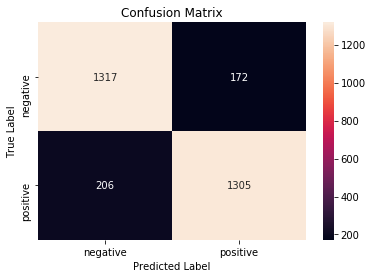

In [88]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      1489
    positive       0.88      0.86      0.87      1511

   micro avg       0.87      0.87      0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [104]:
#Performing perturbation test
weight = model.best_estimator_.coef_

In [105]:
import copy
X_trainp = copy.deepcopy(X_train) # copy data
e = np.random.normal(0,0.01)
print(e)
X_trainp.data = np.add(X_trainp.data, e, out=X_trainp.data, casting="unsafe")

0.005586755254739787


In [108]:
clfp = LogisticRegression(penalty='l2',C=1,solver='newton-cg', random_state=0, multi_class='multinomial')
clfp.fit(X_trainp, y_train)
weightsp=clfp.coef_



In [109]:
weights_diff=abs((weightsp-weight)/weight)*100
print(weights_diff.max())
print(weights_diff.min())
print(weights_diff.std())

156339.36510484797
0.13124229359230685
1559.5799564191725


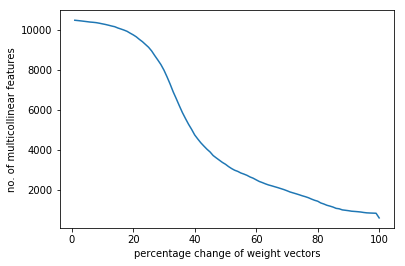

In [112]:
percentage_change=[]
collinear_features =[]

for i in range(1,101):
    f=np.where(weights_diff > i)[1].size
    percentage_change.append(i)
    collinear_features.append(f)
    
plt.xlabel('percentage change of weight vectors')
plt.ylabel('no. of multicollinear features')
plt.plot(percentage_change,collinear_features)

In [113]:
#TF_IDF
# split data into train and test where 70% data used to train model and 30% for test
# final_data[:int(len(final_data) * 0.75)], final_data[int(len(final_data) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(7000,) (7000,) (3000,)


In [114]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
y_test = np.nan_to_num(y_test)

In [115]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1, 2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

<7000x164356 sparse matrix of type '<class 'numpy.float64'>'
	with 495940 stored elements in Compressed Sparse Row format>

In [116]:
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(3000, 164356)

In [117]:
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = None, cv= 10)
model.fit(X_train, y_train)

print(model.best_estimator_)

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [118]:
pred = model.predict(x_test)
from sklearn import metrics

# Accuracy on train data
train_acc_bow = model.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 1.0


In [119]:
#Accuracy on test data
metrics.accuracy_score(y_test, pred)

0.8923333333333333

In [120]:
'''Observation - This model is good for classification
because it give a best accuracy on train and unseen dataset.
'''

'Observation - This model is good for classification\nbecause it give a best accuracy on train and unseen dataset.\n'

In [121]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1332,  157],
       [ 166, 1345]])

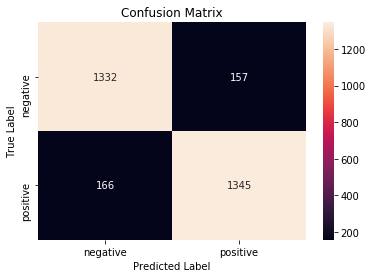

In [122]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      1489
    positive       0.90      0.89      0.89      1511

   micro avg       0.89      0.89      0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



In [124]:
'''
conclusion-
This classifcation is also good for sentimental analysis
LR with TFIDF give a best accuracy on unseen dataset
'''

'\nconclusion-\nThis classifcation is also good for sentimental analysis\nLR with TFIDF give a best accuracy on unseen dataset\n'